In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
mail = pd.read_csv('mail_data.csv')

In [3]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail= mail.where((pd.notnull(mail)),'')

In [7]:
mail.Category = mail.Category.map({'spam':0, 'ham':1})

In [8]:
X = mail['Message']

y = mail['Category']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline
model = Pipeline([
     ('v', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('lr', LogisticRegression()),
])

model.fit(X_train, y_train)

Pipeline(steps=[('v', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression())])

In [11]:
predicted = model.predict(X_test)
model.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [12]:
model.score(X_test,y_test)

0.9775784753363229

<Axes: >

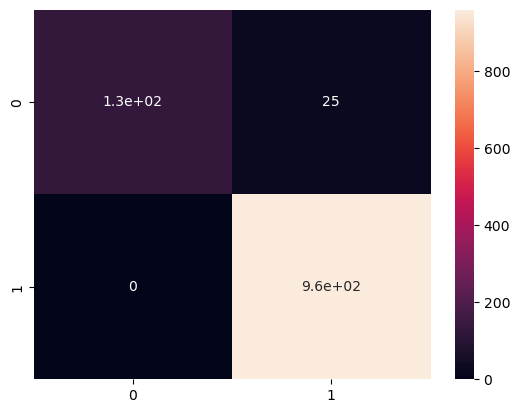

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
plt.ylabel('Truth')
sn.heatmap(confusion_matrix(y_test, predicted), annot=True)

In [14]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]


prediction = model.predict(input_mail)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
